<a href="https://colab.research.google.com/github/yucellgereklioglu/datasciencework/blob/main/Fictional_Battle_Predictors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.stats import shapiro, ttest_ind, f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
data=pd.read_csv('/content/fictional char.csv')
data.head()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0


In [14]:
data.tail()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
2346,Superman,DC Comics,9,8,5,Super Strength,Kryptonite,0
2347,Superman,DC Comics,2,5,8,Super Strength,Magic,1
2348,Flash,DC Comics,5,3,3,Telekinesis,Wooden Stake,0
2349,Batman,DC Comics,5,10,6,Flight,Wooden Stake,1
2350,Spider-Man,Marvel,8,1,5,Super Strength,Magic,1


In [11]:
data.shape

(2351, 8)

In [13]:
data.dtypes

Character           object
Universe            object
Strength             int64
Speed                int64
Intelligence         int64
SpecialAbilities    object
Weaknesses          object
BattleOutcome        int64
dtype: object

In [35]:
duplicates = data.duplicated()
print("\nNumber of Duplicates:", duplicates.sum())
data.drop_duplicates(inplace=True)


Number of Duplicates: 6


In [53]:
data['Character']=data['Character'].astype('category')

In [46]:
data.dtypes

Character           category
Universe               int64
Strength               int64
Speed                  int64
Intelligence           int64
SpecialAbilities       int64
Weaknesses             int64
BattleOutcome          int64
dtype: object

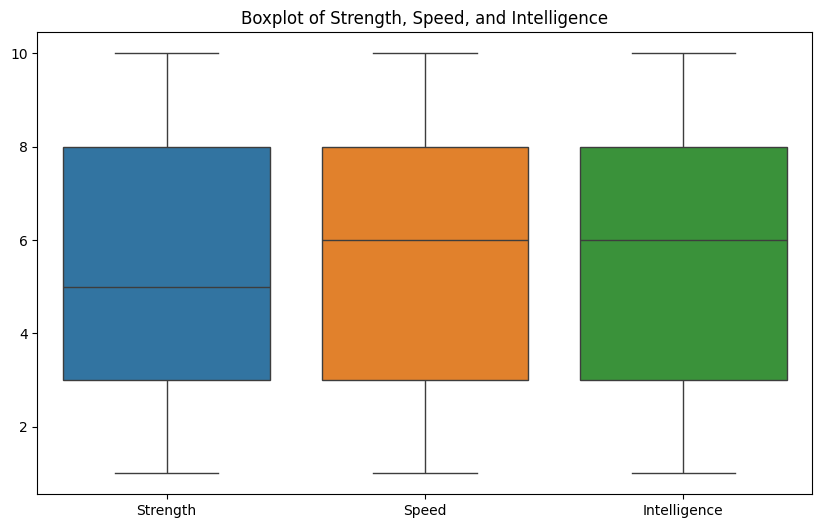

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Strength', 'Speed', 'Intelligence']])
plt.title("Boxplot of Strength, Speed, and Intelligence")
plt.show()

strength is a more specific factor


In [26]:
crosstab_strength_outcome = pd.crosstab(data['Strength'], data['BattleOutcome'], rownames=['Strength'], colnames=['BattleOutcome'])
crosstab_speed_outcome = pd.crosstab(data['Speed'], data['BattleOutcome'], rownames=['Speed'], colnames=['BattleOutcome'])
crosstab_intelligence_outcome = pd.crosstab(data['Intelligence'], data['BattleOutcome'], rownames=['Intelligence'], colnames=['BattleOutcome'])

print("Strength and War Outcome Crosstab:\n", crosstab_strength_outcome)
print("\nSpeed and War Outcome Crosstab:\n", crosstab_speed_outcome)
print("\nIntelligence and War Outcome Crosstab:\n", crosstab_intelligence_outcome)


Strength and War Outcome Crosstab:
 BattleOutcome    0    1
Strength               
1              234   22
2              196   41
3              206   32
4              178   43
5              190   59
6              165   59
7              145   83
8              139   96
9              133   94
10             109  127

Speed and War Outcome Crosstab:
 BattleOutcome    0   1
Speed                 
1              206  42
2              167  42
3              199  49
4              187  50
5              169  59
6              185  70
7              147  71
8              158  95
9              139  94
10             138  84

Intelligence and War Outcome Crosstab:
 BattleOutcome    0    1
Intelligence           
1              200   20
2              204   38
3              175   47
4              183   53
5              169   55
6              189   66
7              182   83
8              136   75
9              113  104
10             144  115


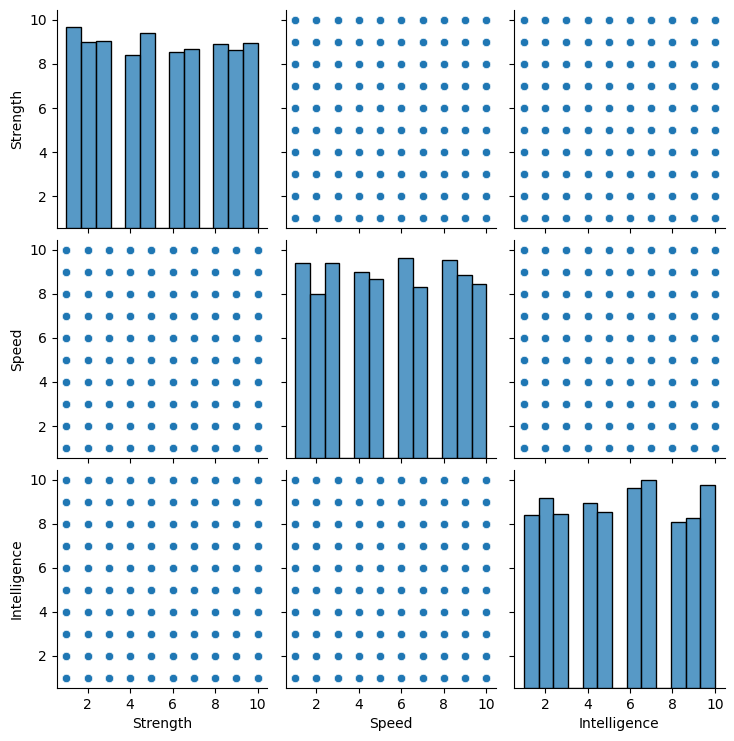

In [28]:
numeric_columns = ['Strength', 'Speed', 'Intelligence']
sns.pairplot(data[numeric_columns])
plt.show()


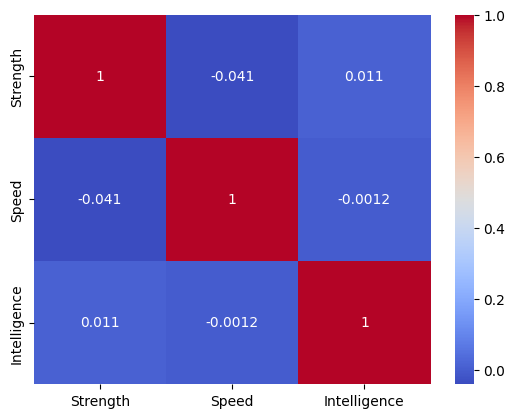

In [29]:
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

In [54]:
LE=LabelEncoder()
data['BattleOutcome']=LE.fit_transform(data['BattleOutcome'])
data['SpecialAbilities']=LE.fit_transform(data['SpecialAbilities'])
data['Weaknesses']=LE.fit_transform(data['Weaknesses'])
data['Universe']=LE.fit_transform(data['Universe'])
data['Character']=LE.fit_transform(data['Character'])

In [55]:
data.tail()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
2346,5,0,9,8,5,2,0,0
2347,5,0,2,5,8,2,1,1
2348,2,0,5,3,3,3,3,0
2349,0,0,5,10,6,0,3,1
2350,4,1,8,1,5,2,1,1


In [117]:
data.head(19)

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,7,1,7,8,3,3,0,0
1,3,1,4,7,9,3,0,0
2,3,0,8,7,5,3,1,0
3,4,0,5,6,10,3,0,0
4,2,1,7,6,2,1,1,0
5,4,0,10,9,7,1,3,1
6,7,1,3,6,2,2,2,1
7,6,0,7,2,4,1,1,1
8,0,0,8,2,7,0,2,0
9,3,0,5,5,4,0,3,0


In [58]:
x=data.drop(['BattleOutcome'],axis=1)
y=data['BattleOutcome']

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
model=SVC()
model=RandomForestClassifier()
model=GradientBoostingClassifier()
model=AdaBoostClassifier()
model=LogisticRegression()
model=DecisionTreeClassifier()


In [72]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [73]:
x_test.shape,y_test.shape

((587, 7), (587,))

In [74]:
y_pred=model.predict(x_test)

In [79]:
from sklearn.metrics import confusion_matrix
model.score(x_test,y_test)

0.706984667802385

In [82]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_pred,y_test)
cm

array([[336,  79],
       [ 93,  79]])

In [83]:
cm.diagonal().sum()/cm.sum()

0.706984667802385

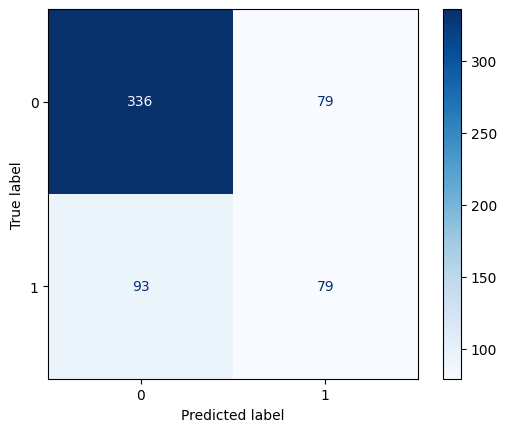

In [91]:
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp_cm.plot(cmap=plt.cm.Blues)
plt.show()

In [97]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.7921635434412265

In [98]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[376,  69],
       [ 53,  89]])

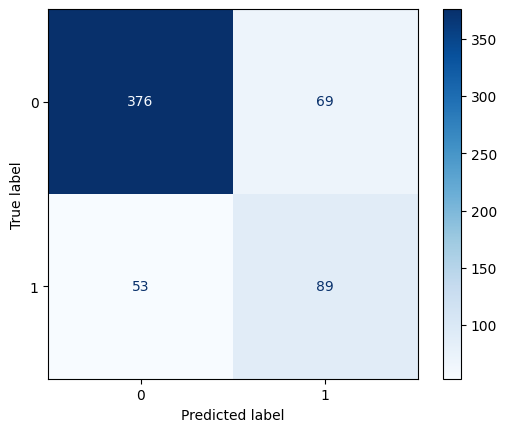

In [100]:
disp_cm2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp_cm2.plot(cmap=plt.cm.Blues)
plt.show()

In [104]:
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.7734241908006815

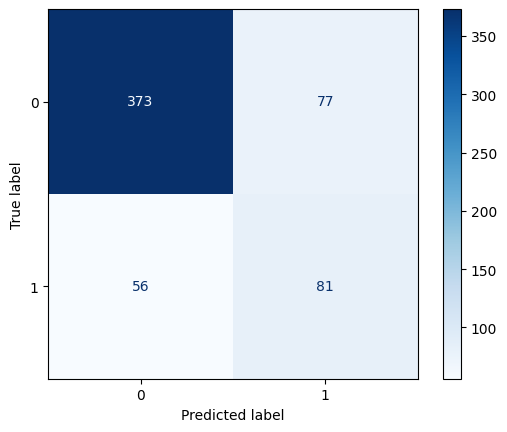

In [105]:
cm=confusion_matrix(y_pred,y_test)
disp_cm3 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp_cm3.plot(cmap=plt.cm.Blues)
plt.show()

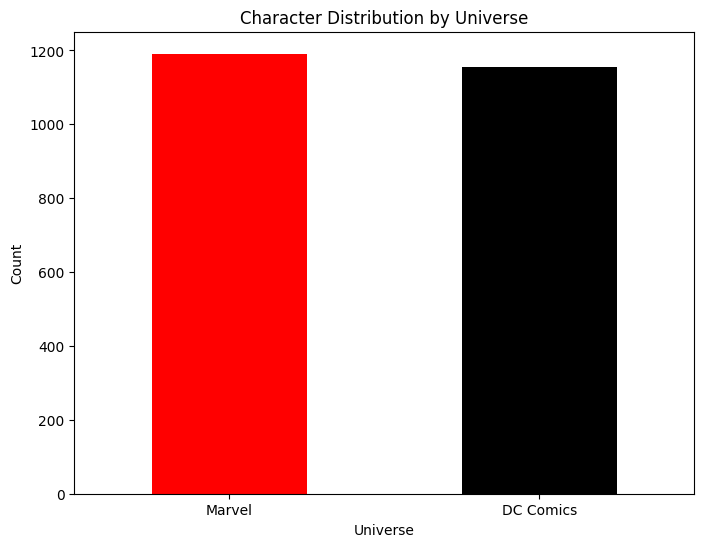

In [135]:
plt.figure(figsize=(8, 6))
data['Universe'].value_counts().plot(kind='bar', color=['red', 'black'])
plt.title('Character Distribution by Universe')
plt.xlabel('Universe')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Marvel', 'DC Comics'], rotation=0)
plt.show()

<ipython-input-141-e50d7f4d700f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Universe', y='Strength', data=data, estimator=np.mean, palette=['red','black'])


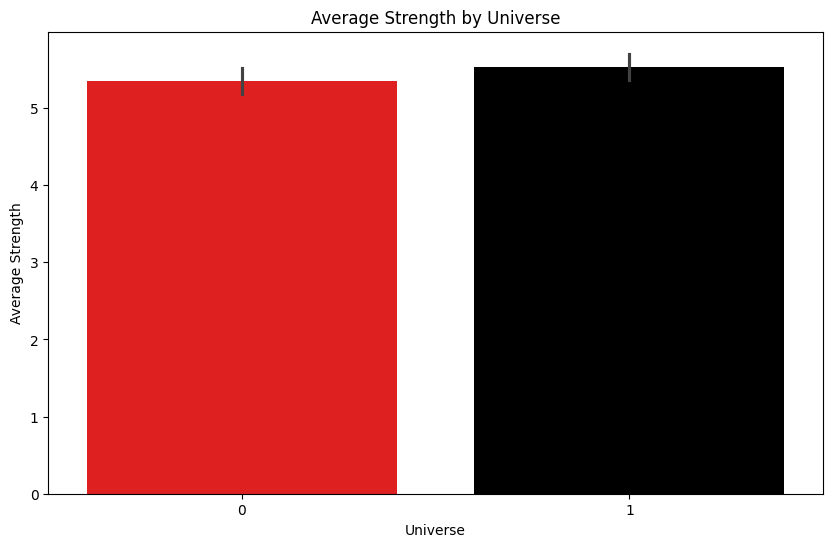

In [141]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Universe', y='Strength', data=data, estimator=np.mean, palette=['red','black'])
plt.title('Average Strength by Universe')
plt.xlabel('Universe')
plt.ylabel('Average Strength')
plt.show()

Text(0, 0.5, 'Count')

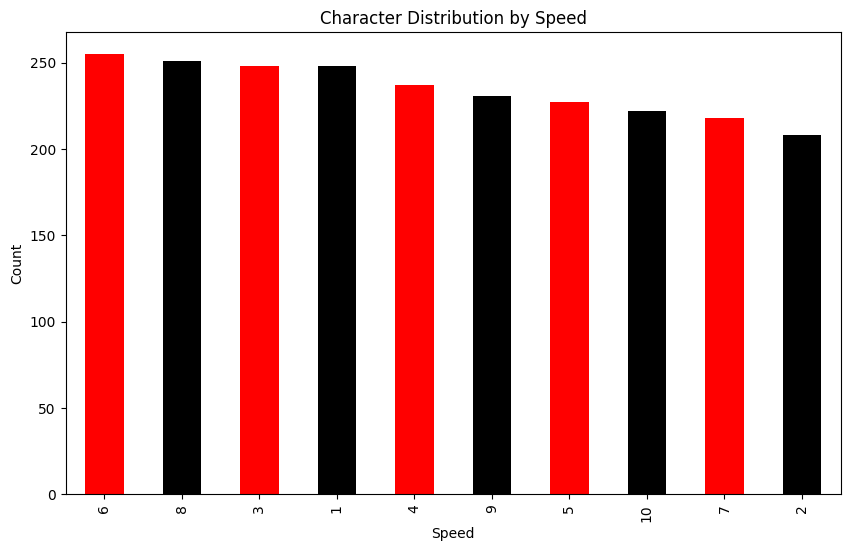

In [136]:
plt.figure(figsize=(10, 6))
data['Speed'].value_counts().plot(kind='bar', color=['red', 'black'])
plt.title('Character Distribution by Speed')
plt.xlabel('Speed')
plt.ylabel('Count')

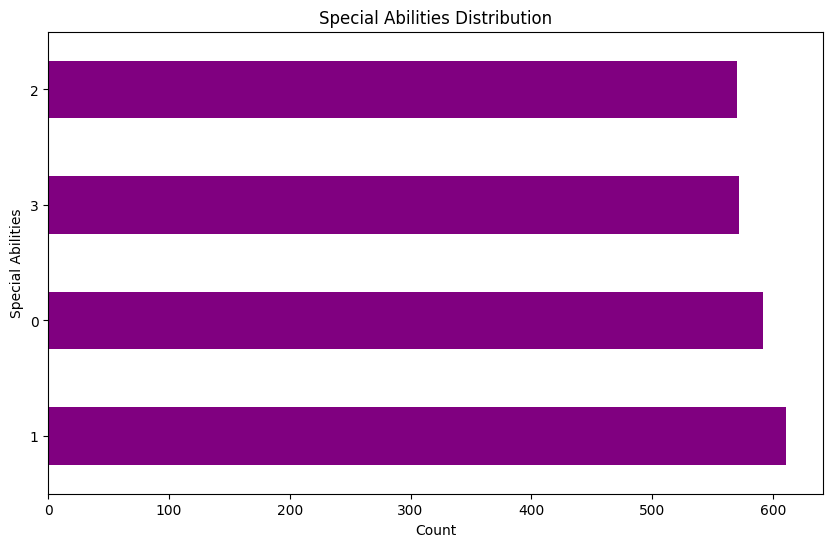

In [142]:
plt.figure(figsize=(10, 6))
data['SpecialAbilities'].value_counts().plot(kind='barh', color='purple')
plt.title('Special Abilities Distribution')
plt.xlabel('Count')
plt.ylabel('Special Abilities')
plt.show()

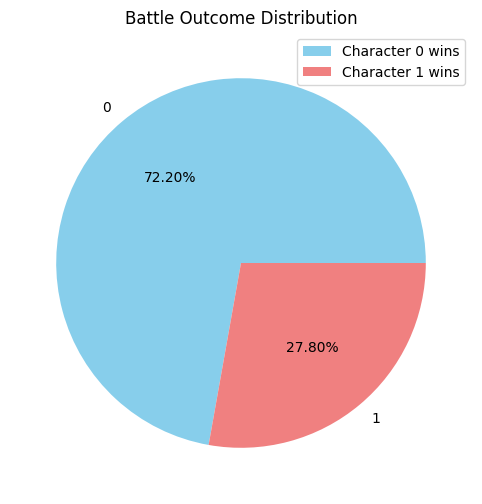

In [143]:
plt.figure(figsize=(10,6))
data['BattleOutcome'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=['skyblue', 'lightcoral'])
plt.title('Battle Outcome Distribution')
plt.ylabel('')
plt.legend(['Character 0 wins', 'Character 1 wins'], loc='best')
plt.show()